In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from datetime import datetime

In [ ]:
filename = "/content/gdrive/MyDrive/ai_for_hearts/USAforUNHCR_LeadGen_Emails.csv" #do we also combine this df?
df = pd.read_csv(filename)

filename2 = "/content/gdrive/MyDrive/ai_for_hearts/updated_lgadv_contacts.csv"
df2 = pd.read_csv(filename2)

filename3 = "/content/gdrive/MyDrive/ai_for_hearts/clicks (1).csv"
df_click = pd.read_csv(filename3)

filename4 = "/content/gdrive/MyDrive/ai_for_hearts/opens (1).csv"
df_open = pd.read_csv(filename4)

filename5 = "/content/gdrive/MyDrive/ai_for_hearts/sent (1).csv"
df_sent = pd.read_csv(filename5)


## DATA UNDERSTADING

In [ ]:
df.head()

,contactid,emailid,emailname,senddate,opendate,clickdate
0,0031K0000385TbjQAE,37925,201906 - Lead Gen Welcome - Email 1 - DM,2022-01-01 09:03:41.760000000,NaN,NaN
1,0031K0000385TiGQAU,37925,201906 - Lead Gen Welcome - Email 1 - DM,2022-01-01 09:03:41.760000000,NaN,NaN
2,0031K0000385TP9QAM,37925,201906 - Lead Gen Welcome - Email 1 - DM,2022-01-01 09:03:41.760000000,NaN,NaN
3,0031K0000385TQbQAM,37925,201906 - Lead Gen Welcome - Email 1 - DM,2022-01-01 09:03:41.760000000,NaN,NaN
4,0031K0000385TqzQAE,37925,201906 - Lead Gen Welcome - Email 1 - DM,2022-01-01 09:03:41.760000000,NaN,NaN


In [ ]:
df2.head()

,contactid,campaignid,name,leadgen,advocacy,accountid,createddate,membership_type__c,first_gift_date__c,first_gift_amount__c,mrc_date__c,mrc_amount__c,current_calendar_year_total_amount__c,current_calendar_year_total_transactions__c,previous_calendar_year_total_amount__c,previous_calendar_year_total_transaction__c,total_amount__c,total_transactions__c,email,phone
0,0031K0000385TNIQA2,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THMvxQAH,2022-01-01 00:08:27+00,Donor Prospect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1,0031K0000385TZJQA2,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THN83QAH,2022-01-01 02:33:16+00,Donor Prospect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,0031K0000385TavQAE,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THN9aQAH,2022-01-01 02:55:58+00,Donor Prospect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,0031K0000385Tc8QAE,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THNAsQAP,2022-01-01 03:11:39+00,Donor Prospect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
4,0031K0000385TdQQAU,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THNCFQA5,2022-01-01 03:27:19+00,Donor Prospect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [ ]:
df.shape

(398061, 6)

In [ ]:
df2.shape

(24713, 20)

In [ ]:
df.shape[0]

398061

dropping null values for datasets

In [ ]:
#null value count for dataset 1
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

contactid         0
emailid           0
emailname         0
senddate          0
opendate     308887
clickdate    392130
dtype: int64

In [ ]:
#null value count for dataset 2
nan_count2 = np.sum(df2.isnull(), axis = 0)
nan_count2

# observation: looks like 200 people donated from shape and the number of null values

contactid                                          0
campaignid                                         0
name                                               0
leadgen                                            0
advocacy                                           0
accountid                                          0
createddate                                        0
membership_type__c                                 0
first_gift_date__c                             24511
first_gift_amount__c                           24511
mrc_date__c                                    24511
mrc_amount__c                                  24511
current_calendar_year_total_amount__c          24511
current_calendar_year_total_transactions__c    24511
previous_calendar_year_total_amount__c         24511
previous_calendar_year_total_transaction__c    24511
total_amount__c                                24506
total_transactions__c                          24506
email                                         

In [ ]:
col_types1 = df.dtypes
col_types1
# all features are objects besides emailid which is an int type

contactid    object
emailid       int64
emailname    object
senddate     object
opendate     object
clickdate    object
dtype: object

In [ ]:
col_types2 = df2.dtypes
col_types2
# donation amounts are floats

contactid                                       object
campaignid                                      object
name                                            object
leadgen                                          int64
advocacy                                         int64
accountid                                       object
createddate                                     object
membership_type__c                              object
first_gift_date__c                              object
first_gift_amount__c                           float64
mrc_date__c                                     object
mrc_amount__c                                  float64
current_calendar_year_total_amount__c          float64
current_calendar_year_total_transactions__c    float64
previous_calendar_year_total_amount__c         float64
previous_calendar_year_total_transaction__c    float64
total_amount__c                                float64
total_transactions__c                          float64
email     

In [ ]:
df1_no_na = df[df['opendate'].notna()]
df1_no_na.head()

,contactid,emailid,emailname,senddate,opendate,clickdate
9,0031K0000385aRTQAY,37925,201906 - Lead Gen Welcome - Email 1 - DM,2022-01-04 09:07:44.720000000,2022-01-04 10:27:52,NaN
21,0031K0000385W1PQAU,89462,20220105 - EOY Thank You Engagement - full fil...,2022-01-05 11:02:52.350000000,2022-01-05 11:09:14,NaN
67,0031K0000385eVBQAY,37928,201906 - Lead Gen Welcome - Email 3 - DM,2022-01-11 09:07:44.643000000,2022-01-11 09:29:24,NaN
72,0031K0000385WEtQAM,37930,201906 - Lead Gen Welcome - Email 4 - DM - sta...,2022-01-12 09:06:13.660000000,2022-01-12 16:09:58,NaN
78,0031K0000385WFSQA2,39536,201906 - Lead Gen Welcome - Email 4 - DM - donor,2022-01-12 09:06:43.100000000,2022-01-12 13:33:35,NaN


In [ ]:
df1_no_na.fillna(0)

,contactid,emailid,emailname,senddate,opendate,clickdate
9,0031K0000385aRTQAY,37925,201906 - Lead Gen Welcome - Email 1 - DM,2022-01-04 09:07:44.720000000,2022-01-04 10:27:52,0
21,0031K0000385W1PQAU,89462,20220105 - EOY Thank You Engagement - full fil...,2022-01-05 11:02:52.350000000,2022-01-05 11:09:14,0
67,0031K0000385eVBQAY,37928,201906 - Lead Gen Welcome - Email 3 - DM,2022-01-11 09:07:44.643000000,2022-01-11 09:29:24,0
72,0031K0000385WEtQAM,37930,201906 - Lead Gen Welcome - Email 4 - DM - sta...,2022-01-12 09:06:13.660000000,2022-01-12 16:09:58,0
78,0031K0000385WFSQA2,39536,201906 - Lead Gen Welcome - Email 4 - DM - donor,2022-01-12 09:06:43.100000000,2022-01-12 13:33:35,0
...,...,...,...,...,...,...
398037,0031K00003Clo2VQAR,37928,201906 - Lead Gen Welcome - Email 3 - DM,2022-07-26 08:10:09.780000000,2022-07-26 09:54:02,0
398040,0031K00003Clo3aQAB,37928,201906 - Lead Gen Welcome - Email 3 - DM,2022-07-26 08:10:09.780000000,2022-07-26 14:43:38,0
398046,0031K00003Clo49QAB,37928,201906 - Lead Gen Welcome - Email 3 - DM,2022-07-26 08:10:09.780000000,2022-07-26 19:04:50,0
398051,0031K00003Clo6HQAR,37928,201906 - Lead Gen Welcome - Email 3 - DM,2022-07-26 08:10:09.780000000,2022-07-26 08:28:13,0


In [ ]:
nan_count = np.sum(df1_no_na.isnull(), axis = 0)
nan_count

contactid        0
emailid          0
emailname        0
senddate         0
opendate         0
clickdate    84072
dtype: int64

In [ ]:
df2_no_na = df2[df2['first_gift_date__c'].notna()]
df2_no_na.head()

,contactid,campaignid,name,leadgen,advocacy,accountid,createddate,membership_type__c,first_gift_date__c,first_gift_amount__c,mrc_date__c,mrc_amount__c,current_calendar_year_total_amount__c,current_calendar_year_total_transactions__c,previous_calendar_year_total_amount__c,previous_calendar_year_total_transaction__c,total_amount__c,total_transactions__c,email,phone
31,0031K0000385UdIQAU,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THOEWQA5,2022-01-01 21:15:36+00,Individual Donor,2022-02-26,25.0,2022-02-26,25.0,25.0,1.0,0.0,0.0,25.0,1.0,1,1
248,0031K0000385j8nQAA,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THbyIQAT,2022-01-06 12:10:02+00,Individual Donor,2022-01-23,20.0,2022-01-23,20.0,20.0,1.0,0.0,0.0,20.0,1.0,1,1
276,0031K0000385mZqQAI,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THf9rQAD,2022-01-06 22:02:59+00,Individual Donor,2022-01-06,30.0,2022-03-06,30.0,90.0,3.0,0.0,0.0,90.0,3.0,1,1
333,0031K0000385qrwQAA,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THj2gQAD,2022-01-07 23:17:25+00,Individual Donor,2022-05-10,7.0,2022-05-10,7.0,7.0,1.0,0.0,0.0,7.0,1.0,1,1
346,0031K0000385rAlQAI,7011K000001HSNYQA4,2021_YEMEN_FB,1,0,0011K00002THjIWQA1,2022-01-08 02:50:32+00,Individual Donor,2022-02-27,60.0,2022-08-31,30.9,245.4,7.0,0.0,0.0,245.4,7.0,1,1


In [ ]:
nan_count = np.sum(df2_no_na.isnull(), axis = 0)
nan_count

contactid                                      0
campaignid                                     0
name                                           0
leadgen                                        0
advocacy                                       0
accountid                                      0
createddate                                    0
membership_type__c                             0
first_gift_date__c                             0
first_gift_amount__c                           0
mrc_date__c                                    0
mrc_amount__c                                  0
current_calendar_year_total_amount__c          0
current_calendar_year_total_transactions__c    0
previous_calendar_year_total_amount__c         0
previous_calendar_year_total_transaction__c    0
total_amount__c                                0
total_transactions__c                          0
email                                          0
phone                                          0
dtype: int64

In [ ]:
df.shape

(398061, 6)

In [ ]:
df1_no_na.shape

(89174, 6)

In [ ]:
df2.shape

(24713, 20)

In [ ]:
df2_no_na.shape

(202, 20)

In [ ]:
#df1_no_na['time_diff'] = df1_no_na['senddate'] - df1_no_na['opendate']

In [ ]:
#%matplotlib inline
#x= df1_no_na['senddate']
#y= df1_no_na['opendate']
#plt.plot(x,y)

Additional Datasets

In [ ]:
df_click = df_click.rename({'eventdate': 'eventdate_click', 'eventtype':'eventtype_click'}, axis=1)

In [ ]:
df_click.shape

(6939, 6)

In [ ]:
df_click.head()

,contactid,eventdate_click,eventtype_click,sendid,urlid,url
0,0031K00003B2PQmQAN,4/21/2022 12:08:19 AM,Click,765495,365099,https://www.unrefugees.org/news/army-veteran-a...
1,0031K00003B2PQmQAN,4/21/2022 12:10:08 AM,Click,765495,337899,https://www.unrefugees.org/news/not-even-monso...
2,0031K00003AQPzjQAH,4/20/2022 10:41:07 AM,Click,765495,365099,https://www.unrefugees.org/news/army-veteran-a...
3,0031K00003BNevBQAT,4/21/2022 11:46:52 AM,Click,890270,1094332,https://www.unrefugees.org/news/learn-how-you-...
4,0031K00003BOdezQAD,4/21/2022 11:26:15 AM,Click,890270,158534,http://www.facebook.com/UNREFUGEES?utm_medium=...


In [ ]:
nan_count3 = np.sum(df_click.isnull(), axis = 0)
print(nan_count3)

contactid          0
eventdate_click    0
eventtype_click    0
sendid             0
urlid              0
url                0
dtype: int64


In [ ]:
print(df_click['eventtype_click'].unique())

['Click']


In [ ]:
df_click['eventtype_click'] = df_click['eventtype_click'].map({'Click' : 1, '' : 0})

In [ ]:
df_click.head()

,contactid,eventdate_click,eventtype_click,sendid,urlid,url
0,0031K00003B2PQmQAN,4/21/2022 12:08:19 AM,1,765495,365099,https://www.unrefugees.org/news/army-veteran-a...
1,0031K00003B2PQmQAN,4/21/2022 12:10:08 AM,1,765495,337899,https://www.unrefugees.org/news/not-even-monso...
2,0031K00003AQPzjQAH,4/20/2022 10:41:07 AM,1,765495,365099,https://www.unrefugees.org/news/army-veteran-a...
3,0031K00003BNevBQAT,4/21/2022 11:46:52 AM,1,890270,1094332,https://www.unrefugees.org/news/learn-how-you-...
4,0031K00003BOdezQAD,4/21/2022 11:26:15 AM,1,890270,158534,http://www.facebook.com/UNREFUGEES?utm_medium=...


In [ ]:
df_click['eventtype_click'].dtype # check column only has integers

dtype('int64')

In [ ]:
df_open = df_open.rename({'eventdate': 'eventdate_open', 'eventtype':'eventtype_open'}, axis=1)

In [ ]:
df_open.head()

,contactid,eventdate_open,eventtype_open,sendid
0,0031K0000386BslQAE,4/19/22 7:37,Open,883709
1,0031K0000386BslQAE,4/19/22 7:37,Open,877618
2,0031K00003AMz7nQAD,4/19/22 7:41,Open,886508
3,0031K00003AO0VcQAL,4/19/22 8:04,Open,889440
4,0031K00003877mQQAQ,4/19/22 8:05,Open,889440


In [ ]:
df_open.shape

(137870, 4)

In [ ]:
nan_count4 = np.sum(df_open.isnull(), axis = 0)
print(nan_count4)

contactid         0
eventdate_open    0
eventtype_open    0
sendid            0
dtype: int64


In [ ]:
print(df_open['eventtype_open'].unique())

['Open']


In [ ]:
df_open['eventtype_open'] = df_open['eventtype_open'].map({'Open' : 1, '' : 0})

In [ ]:
df_open.head()

,contactid,eventdate_open,eventtype_open,sendid
0,0031K0000386BslQAE,4/19/22 7:37,1,883709
1,0031K0000386BslQAE,4/19/22 7:37,1,877618
2,0031K00003AMz7nQAD,4/19/22 7:41,1,886508
3,0031K00003AO0VcQAL,4/19/22 8:04,1,889440
4,0031K00003877mQQAQ,4/19/22 8:05,1,889440


In [ ]:
df_open['eventtype_open'].dtype # check column only has integers

dtype('int64')

In [ ]:
df_sent = df_sent.rename({'eventdate': 'eventdate_sent', 'eventtype': 'eventtype_sent'}, axis=1)

In [ ]:
df_sent.head()

,contactid,eventdate_sent,eventtype_sent,sendid
0,0031K00003B42UhQAJ,4/28/22 8:02,Sent,891711
1,0031K00003B42UhQAJ,4/19/22 8:04,Sent,889440
2,0031K00003B42fvQAB,4/28/22 8:02,Sent,891711
3,0031K00003B438DQAR,5/17/22 15:01,Sent,906349
4,0031K00003B44irQAB,5/8/22 16:01,Sent,902017


In [ ]:
print(df_sent['eventtype_sent'].unique())

['Sent']


In [ ]:
df_sent['eventtype_sent'] = df_sent['eventtype_sent'].map({'Sent' : 1, '' : 0})

In [ ]:
df_open['eventtype_open'].dtype # check column only has integers

dtype('int64')

In [ ]:
df_sent.head()

,contactid,eventdate_sent,eventtype_sent,sendid
0,0031K00003B42UhQAJ,4/28/22 8:02,1,891711
1,0031K00003B42UhQAJ,4/19/22 8:04,1,889440
2,0031K00003B42fvQAB,4/28/22 8:02,1,891711
3,0031K00003B438DQAR,5/17/22 15:01,1,906349
4,0031K00003B44irQAB,5/8/22 16:01,1,902017


In [ ]:
nan_count5 = np.sum(df_sent.isnull(), axis = 0)
print(nan_count5)

contactid         0
eventdate_sent    0
eventtype_sent    0
sendid            0
dtype: int64


Groupby for each dataframe (aggregation through contact ids)

In [ ]:
df_click_groupbys = df_click.groupby(['contactid']).sum()

In [ ]:
df_sent_groupbys = df_sent.groupby(['contactid']).sum()

In [ ]:
df_open_groupbys = df_open.groupby(['contactid']).sum()

Merging of Main DataFrames with Left Joins

In [ ]:
print(df_click.columns)

Index(['contactid', 'eventdate_click', 'eventtype_click', 'sendid', 'urlid',
       'url'],
      dtype='object')


In [ ]:
print(df_open.columns)

Index(['contactid', 'eventdate_open', 'eventtype_open', 'sendid'], dtype='object')


In [ ]:
s1 = df_click_groupbys.merge( df_open_groupbys, how='inner', on=['contactid'])

In [ ]:
s1

,eventtype_click,sendid_x,urlid,eventtype_open,sendid_y
contactid,,,,,
0031K0000385TiGQAU,1,865923,1517543,33,29231621
0031K0000385TrdQAE,1,860781,1511197,8,6468129
0031K0000385USpQAM,1,765498,158533,4,3438870
0031K0000385UeVQAU,1,765498,290643,8,6368546
0031K0000385UkxQAE,1,937762,1300915,2,1793333
...,...,...,...,...,...
0031K00003Ck2xbQAB,1,937758,1652199,20,18380241
0031K00003Ck44JQAR,1,937758,158538,1,937758
0031K00003Ck5qTQAR,3,2296494,871926,16,13904304


In [ ]:
s1.shape

(2493, 5)

In [ ]:
s2 = s1.merge(df_sent_groupbys, how = 'inner', on = 'contactid')

In [ ]:
s2

,eventtype_click,sendid_x,urlid,eventtype_open,sendid_y,eventtype_sent,sendid
contactid,,,,,,,
0031K0000385TiGQAU,1,865923,1517543,33,29231621,56,49535533
0031K0000385TrdQAE,1,860781,1511197,8,6468129,15,12301169
0031K0000385USpQAM,1,765498,158533,4,3438870,56,49535674
0031K0000385UeVQAU,1,765498,290643,8,6368546,56,49535687
0031K0000385UkxQAE,1,937762,1300915,2,1793333,56,49535706
...,...,...,...,...,...,...,...
0031K00003Ck2xbQAB,1,937758,1652199,20,18380241,16,14381483
0031K00003Ck44JQAR,1,937758,158538,1,937758,16,14381503
0031K00003Ck5qTQAR,3,2296494,871926,16,13904304,16,14381482


In [ ]:
s2["donors"] = pd.NaT
s2

,eventtype_click,sendid_x,urlid,eventtype_open,sendid_y,eventtype_sent,sendid,donors
contactid,,,,,,,,
0031K0000385TiGQAU,1,865923,1517543,33,29231621,56,49535533,NaT
0031K0000385TrdQAE,1,860781,1511197,8,6468129,15,12301169,NaT
0031K0000385USpQAM,1,765498,158533,4,3438870,56,49535674,NaT
0031K0000385UeVQAU,1,765498,290643,8,6368546,56,49535687,NaT
0031K0000385UkxQAE,1,937762,1300915,2,1793333,56,49535706,NaT
...,...,...,...,...,...,...,...,...
0031K00003Ck2xbQAB,1,937758,1652199,20,18380241,16,14381483,NaT
0031K00003Ck44JQAR,1,937758,158538,1,937758,16,14381503,NaT
0031K00003Ck5qTQAR,3,2296494,871926,16,13904304,16,14381482,NaT


In [ ]:
s2_final = s2.drop(['sendid_x', 'urlid', 'sendid_y', 'sendid'], axis=1)
s2_final['donors'] = s2_final['donors'].fillna(0)
s2_final

,eventtype_click,eventtype_open,eventtype_sent,donors
contactid,,,,
0031K0000385TiGQAU,1,33,56,0
0031K0000385TrdQAE,1,8,15,0
0031K0000385USpQAM,1,4,56,0
0031K0000385UeVQAU,1,8,56,0
0031K0000385UkxQAE,1,2,56,0
...,...,...,...,...
0031K00003Ck2xbQAB,1,20,16,0
0031K00003Ck44JQAR,1,1,16,0
0031K00003Ck5qTQAR,3,16,16,0


In [ ]:
s2_final.shape

(2493, 4)

In [ ]:
s4 = s2_final.merge(df1_no_na, how = 'left', on = 'contactid')
s4

,contactid,eventtype_click,eventtype_open,eventtype_sent,donors,emailid,emailname,senddate,opendate,clickdate
0,0031K0000385TiGQAU,1,33,56,0,90387.0,20220119 - Afghanistan Conversion Nazia Appeal...,2022-01-19 12:01:42.913000000,2022-01-20 08:17:28,NaN
1,0031K0000385TiGQAU,1,33,56,0,90504.0,20220125 - Afghanistan Conversion Fauzia Appea...,2022-01-25 09:03:00.333000000,2022-01-25 13:14:35,NaN
2,0031K0000385TiGQAU,1,33,56,0,92518.0,20220224 - Ukraine Emergency Appeal - full fil...,2022-02-24 11:31:27.120000000,2022-02-24 14:44:46,NaN
3,0031K0000385TiGQAU,1,33,56,0,92921.0,20220308 - IWD Ukraine Engagement - new or eng...,2022-03-08 08:01:52.137000000,2022-03-08 10:32:45,2022-03-08 10:32:06
4,0031K0000385TiGQAU,1,33,56,0,94183.0,20220324 - Ukraine 1 Month Engagement - full f...,2022-03-24 09:31:42.717000000,2022-03-25 20:15:40,NaN
...,...,...,...,...,...,...,...,...,...,...
16632,0031K00003Ck44JQAR,1,1,16,0,NaN,NaN,NaN,NaN,NaN
16633,0031K00003Ck5qTQAR,3,16,16,0,NaN,NaN,NaN,NaN,NaN
16634,0031K00003Ck5xZQAR,1,1,15,0,NaN,NaN,NaN,NaN,NaN
16635,0031K00003Ck6GTQAZ,1,5,13,0,37925.0,201906 - Lead Gen Welcome - Email 1 - DM,2022-06-30 08:05:54.607000000,2022-06-30 12:23:00,NaN


In [ ]:
s4_final = s4.merge(df2_no_na, how = 'left', on = 'contactid')
s4_final.shape
s4_final

,contactid,eventtype_click,eventtype_open,eventtype_sent,donors,emailid,emailname,senddate,opendate,clickdate,...,mrc_date__c,mrc_amount__c,current_calendar_year_total_amount__c,current_calendar_year_total_transactions__c,previous_calendar_year_total_amount__c,previous_calendar_year_total_transaction__c,total_amount__c,total_transactions__c,email,phone
0,0031K0000385TiGQAU,1,33,56,0,90387.0,20220119 - Afghanistan Conversion Nazia Appeal...,2022-01-19 12:01:42.913000000,2022-01-20 08:17:28,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0031K0000385TiGQAU,1,33,56,0,90504.0,20220125 - Afghanistan Conversion Fauzia Appea...,2022-01-25 09:03:00.333000000,2022-01-25 13:14:35,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0031K0000385TiGQAU,1,33,56,0,92518.0,20220224 - Ukraine Emergency Appeal - full fil...,2022-02-24 11:31:27.120000000,2022-02-24 14:44:46,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0031K0000385TiGQAU,1,33,56,0,92921.0,20220308 - IWD Ukraine Engagement - new or eng...,2022-03-08 08:01:52.137000000,2022-03-08 10:32:45,2022-03-08 10:32:06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0031K0000385TiGQAU,1,33,56,0,94183.0,20220324 - Ukraine 1 Month Engagement - full f...,2022-03-24 09:31:42.717000000,2022-03-25 20:15:40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,0031K00003Ck44JQAR,1,1,16,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16633,0031K00003Ck5qTQAR,3,16,16,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16634,0031K00003Ck5xZQAR,1,1,15,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16635,0031K00003Ck6GTQAZ,1,5,13,0,37925.0,201906 - Lead Gen Welcome - Email 1 - DM,2022-06-30 08:05:54.607000000,2022-06-30 12:23:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
s4_final = s4_final.fillna(0)

In [ ]:
s4_final.dtypes

contactid                                       object
eventtype_click                                  int64
eventtype_open                                   int64
eventtype_sent                                   int64
donors                                           int64
emailid                                        float64
emailname                                       object
senddate                                        object
opendate                                        object
clickdate                                       object
campaignid                                      object
name                                            object
leadgen                                        float64
advocacy                                       float64
accountid                                       object
createddate                                     object
membership_type__c                              object
first_gift_date__c                              object
first_gift

In [ ]:
s4_finalvs = s4_final.select_dtypes(exclude=['object'])
s4_finalvs

,eventtype_click,eventtype_open,eventtype_sent,donors,emailid,leadgen,advocacy,first_gift_amount__c,mrc_amount__c,current_calendar_year_total_amount__c,current_calendar_year_total_transactions__c,previous_calendar_year_total_amount__c,previous_calendar_year_total_transaction__c,total_amount__c,total_transactions__c,email,phone
0,1,33,56,0,90387.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,33,56,0,90504.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,33,56,0,92518.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,33,56,0,92921.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,33,56,0,94183.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,1,1,16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16633,3,16,16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16634,1,1,15,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16635,1,5,13,0,37925.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


DateTime

In [ ]:
#takes s4 dataframe and fills null values with zero as to note remove entire rows in order to not lose data. The resulting dataframe with filled values is named s4_final
#s4_final = s4.fillna("0000-00-00 00:00:00.000")
#s4_final.shape

In [ ]:
# features: freq of donations, how long to open and click, how long until first donation

In [ ]:
# # time difference: send-open, send-click
# # s4['send_day'] = pd.to_datetime(s4['senddate'])
# s4_final['send_day'] = pd.to_datetime(s4_final['senddate'], format='%Y-%m-%d %H:%M:%S')
# # dt = datetime.strptime(datestring, '%Y-%m-%d %H:%M:%S')
# s4_final['send_day']


In [ ]:
# s4_final['open_day'] = pd.to_datetime(s4_final['opendate'], format='%Y-%m-%d %H:%M:%S')
# s4_final['open_day']

In [ ]:
# s4_final['click_day'] = pd.to_datetime(s4_final['clickdate'], format='%Y-%m-%d %H:%M:%S')
# s4_final['click_day']

In [ ]:
# s4_final.shape

In [ ]:
# s4_final['send_open_hrs'] = (s4_final['open_day'] - s4_final['send_day']).dt.seconds // 3600

In [ ]:
# s4_final['send_open_hrs']

In [ ]:
# s4_final['send_click_hrs'] = (s4_final['click_day'] - s4_final['send_day']).dt.seconds // 3600

In [ ]:
# s4_final['send_click_hrs']

In [ ]:
# s4_final.columns

#Model Selection

Decision Tree Model

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
y = s4_finalvs["total_transactions__c"]
X = s4_finalvs.drop(columns = 'total_transactions__c', axis = 1)
print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 16637

Number of Features:16
['eventtype_click', 'eventtype_open', 'eventtype_sent', 'donors', 'emailid', 'leadgen', 'advocacy', 'first_gift_amount__c', 'mrc_amount__c', 'current_calendar_year_total_amount__c', 'current_calendar_year_total_transactions__c', 'previous_calendar_year_total_amount__c', 'previous_calendar_year_total_transaction__c', 'total_amount__c', 'email', 'phone']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(13309, 16)
(3328, 16)


In [ ]:
def train_test_DT(X_train, X_test, y_train, y_test, leaf, depth, crit='entropy'):

    model = DecisionTreeClassifier(criterion = crit, max_depth = depth, min_samples_leaf = leaf)

    model.fit(X_train, y_train)

    class_label_predictions = model.predict(X_test)

    acc_score = accuracy_score(y_test, class_label_predictions)

    return acc_score

In [ ]:
max_depth_range = [1, 15] # more into depth would possibly overfit

acc = []

for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, 1, md)
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
    acc.append(float(score))

Max Depth=1, accuracy score: 0.9936899038461539
Max Depth=15, accuracy score: 1.0


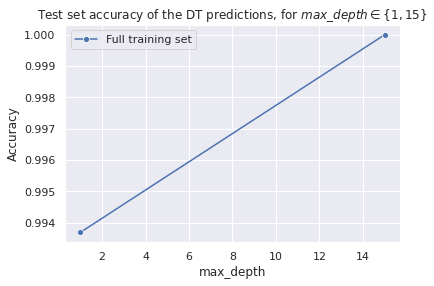

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
p = sns.lineplot(x=max_depth_range, y=acc, marker='o', label = 'Full training set')

plt.title('Test set accuracy of the DT predictions, for $max\_depth\in\{1, 15\}$')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
plt.show()



In [ ]:
max_depth_range = [2**i for i in range(6)]
acc = []

print("Accuracy scores:")
for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, 1, md)
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
    acc.append(float(score))



Accuracy scores:
Max Depth=1, accuracy score: 0.9936899038461539
Max Depth=2, accuracy score: 0.99609375
Max Depth=4, accuracy score: 0.9990985576923077
Max Depth=8, accuracy score: 1.0
Max Depth=16, accuracy score: 1.0
Max Depth=32, accuracy score: 1.0


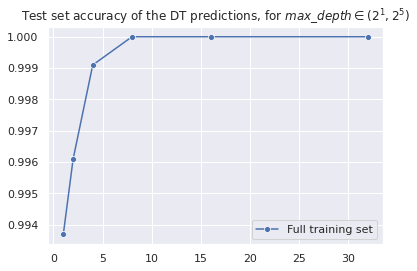

In [ ]:
x = max_depth_range

fig = plt.figure()
p_grid = sns.lineplot(x=x, y=acc, marker='o', label = 'Full training set')

plt.title('Test set accuracy of the DT predictions, for $max\_depth\in(2^1, 2^{5})$')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
plt.show()

